In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [2]:
loans_df_2 = pd.read_csv('/Users/temp/Downloads/Loan Default Prediction - Student Files/loans_df_2')

In [3]:
loans_df_2['STATE_ID'] = loans_df_2['STATE_ID'].astype('category')

In [6]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [23]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)
    
    print(confusion_matrix(y_test,preds))

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.kdeplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default")
    sns.kdeplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default")
    plt.show()

    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

In [11]:
def encode_split(df,target_variable):
    df_dmm = pd.get_dummies(df,drop_first=True)
    X= df_dmm.drop([target_variable],axis=1)
    y = df_dmm[target_variable]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = encode_split(loans_df_2,'LOAN_DEFAULT')

In [18]:
X_train.shape

(186523, 75)

## Random Forest

In [19]:
rf_model = RandomForestClassifier()

In [21]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

[[36020   457]
 [ 9805   349]]


Accuracy:  0.77993180502241
Precision:  0.43300248138957814
Recall:  0.034370691353161315
F1:  0.06368613138686131
AUC:  0.6329779651988107


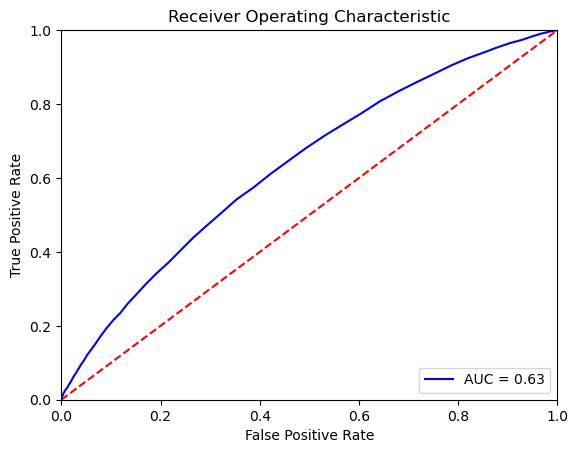

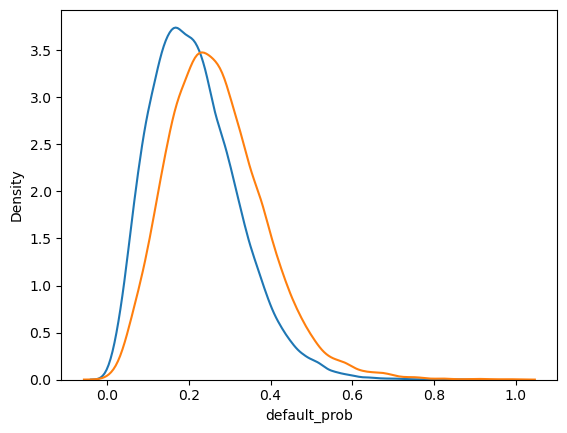

true_class  predicted_class
0           0                  0.987472
            1                  0.012528
1           0                  0.965629
            1                  0.034371
Name: predicted_class, dtype: float64


In [25]:
eval_model(rf_model,X_test,y_test)

## Optimisation
1. Use Grid Search to find appropriate hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {"n_estimators":[10,100,150,200,250,300,350,400,450,500],"max_depth":[3,5,7]}

In [29]:
clf = GridSearchCV(rf_model,params)

In [30]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [10, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [32]:
clf.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [46]:
rfmodel_opti = RandomForestClassifier(n_estimators=200)

In [47]:
rfmodel_opti.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

[[36095   382]
 [ 9851   303]]


Accuracy:  0.7805537089060925
Precision:  0.44233576642335765
Recall:  0.029840456962773293
F1:  0.05590921671740935
AUC:  0.6371053673745075


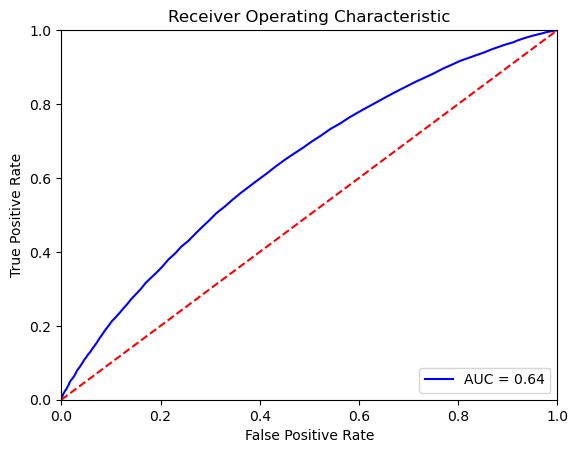

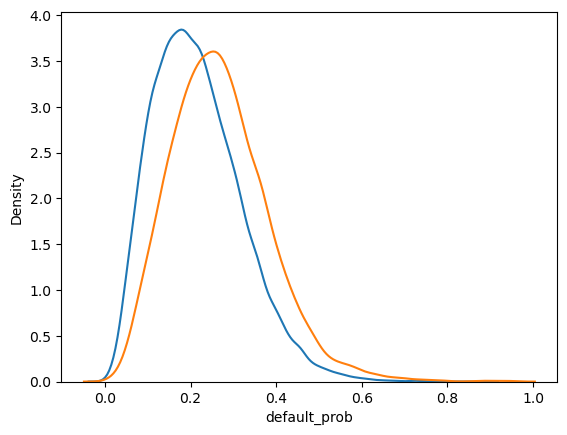

true_class  predicted_class
0           0                  0.989528
            1                  0.010472
1           0                  0.970160
            1                  0.029840
Name: predicted_class, dtype: float64


In [48]:
eval_model(rfmodel_opti,X_test,y_test)